In [9]:
pip install pyforest

  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14607 sha256=bb517a96d01dc3046ad116488a11d6a5e3f768d46ef0136bdc7258c7de011aeb
  Stored in directory: /root/.cache/pip/wheels/61/1c/da/48e6c884142d485475d852d69d20a096aba5beceb338822893
Successfully built pyforest


In [10]:
#import necessary librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import pyforest
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, StandardScaler, PowerTransformer, MinMaxScaler, LabelEncoder, RobustScaler
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, cross_val_predict, train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)

# pd.set_option('display.max_rows', 100) # if you wish to see more rows rather than default, just uncomment this line.
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [11]:
pip install colorama

In [12]:
import colorama
from colorama import Fore, Style  # maakes strings colored
from termcolor import colored

Function for determining the number and percentages of missing values

In [13]:
#finding missing values in a dataset
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

Function for insighting summary information about the column

In [14]:
#finding null values in dataset
def first_looking(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))

Function for examining scores

In [15]:
#splitting data into train and test
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred),
                            "Recall" : recall_score(y_train, y_train_pred),                          
                            "f1" : f1_score(y_train, y_train_pred)},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision" : precision_score(y_test, y_pred),
                           "Recall" : recall_score(y_test, y_pred),                          
                           "f1" : f1_score(y_test, y_pred)}}
    
    return pd.DataFrame(scores)

Load the Data using the Pandas Library

In [19]:
#loading the data
df=pd.read_csv('/content/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.000,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.000,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.000,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.500,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.000,Up,0


1. Age: age of the patient [years]


2. Sex: sex of the patient [M: Male, F: Female]


3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

4. RestingBP: resting blood pressure [mm Hg]


5. Cholesterol: serum cholesterol [mm/dl]


6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]


7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]


8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]


9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]


10. Oldpeak: oldpeak = ST [Numeric value measured in depression]


11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]


12. HeartDisease: output class [1: heart disease, 0: Normal]

Target variable, in the machine learning context, is the variable that is or should be the output. For example it could be binary 0 or 1 if you are classifying or it could be a continuous variable if you are doing a regression. In statistics you also refer to it as the response variable.

In our study our target variable is HeartDisease in the contex of determining whether anybody is likely to get hearth disease based on the input parameters like gender, age and various test results or not.

### EXPLORATORY DATA ANALYSIS and  VISUALIZATION

In [20]:
#finding last five rows in a dataset
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.200,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.400,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.200,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.000,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.000,Up,0


In [21]:
#creating a sample data
df.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
791,51,M,ASY,140,298,0,Normal,122,Y,4.200,Flat,1
763,58,M,NAP,132,224,0,LVH,173,N,3.200,Up,1
916,57,F,ATA,130,236,0,LVH,174,N,0.000,Flat,1
625,59,M,ASY,135,234,0,Normal,161,N,0.500,Flat,0
158,44,M,ASY,130,290,0,Normal,100,Y,2.000,Flat,1
252,61,M,ASY,125,292,0,ST,115,Y,0.000,Up,0
886,52,M,NAP,138,223,0,Normal,169,N,0.000,Up,0
617,57,M,ATA,124,261,0,Normal,141,N,0.300,Up,1
542,54,F,ASY,138,274,0,Normal,105,Y,1.500,Flat,1
187,41,M,ASY,120,237,1,Normal,138,Y,1.000,Flat,1


In [22]:
#finding the columns in a dataset
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [23]:
#finding number rows and columns in a data
df.shape

(918, 12)

In [24]:
#information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [25]:
#statistical description of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.000,53.511,9.433,28.000,47.000,54.000,60.000,77.000
RestingBP,918.000,132.397,18.514,0.000,120.000,130.000,140.000,200.000
Cholesterol,918.000,198.800,109.384,0.000,173.250,223.000,267.000,603.000
FastingBS,918.000,0.233,0.423,0.000,0.000,0.000,0.000,1.000
MaxHR,918.000,136.809,25.460,60.000,120.000,138.000,156.000,202.000
Oldpeak,918.000,0.887,1.067,-2.600,0.000,0.600,1.500,6.200
HeartDisease,918.000,0.553,0.497,0.000,0.000,1.000,1.000,1.000


In [26]:
#finding object data type columns in data
df.describe(include=object).T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


In [27]:
#find number of unique values
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

to find how many unique values object features have

In [28]:
for col in df.select_dtypes(include=[np.number]).columns:
    print(f"{col} has {df[col].nunique()} unique value")

Age has 50 unique value
RestingBP has 67 unique value
Cholesterol has 222 unique value
FastingBS has 2 unique value
MaxHR has 119 unique value
Oldpeak has 53 unique value
HeartDisease has 2 unique value


In [29]:
#finding duplicate values in a dataset
df.duplicated().value_counts()

False    918
dtype: int64

In [30]:
#finding missing values
missing (df)

,Missing_Number,Missing_Percent
HeartDisease,0,0.000
ST_Slope,0,0.000
Oldpeak,0,0.000
ExerciseAngina,0,0.000
MaxHR,0,0.000
RestingECG,0,0.000
FastingBS,0,0.000
Cholesterol,0,0.000
RestingBP,0,0.000
ChestPainType,0,0.000


In [31]:
first_looking("HeartDisease")

column name    :  HeartDisease
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
1    508
0    410
Name: HeartDisease, dtype: int64


1    508
0    410
Name: HeartDisease, dtype: int64


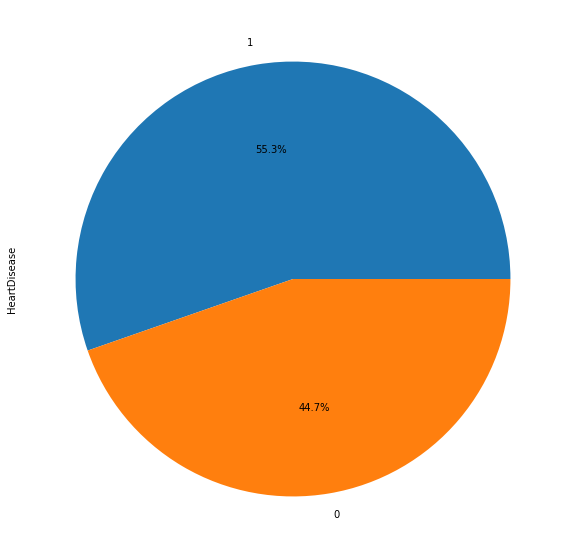

In [32]:
#finding heartdisease rate with pie chart
print(df["HeartDisease"].value_counts())
df["HeartDisease"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(10,10))

In [33]:
y = df['HeartDisease']
print(f'Percentage of Heart Disease: % {round(y.value_counts(normalize=True)[1]*100,2)} --> \
({y.value_counts()[1]} cases for Heart Disease)\nPercentage of NOT Heart Disease: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} cases for NOT Heart Disease)')

Percentage of Heart Disease: % 55.34 --> (508 cases for Heart Disease)
Percentage of NOT Heart Disease: % 44.66 --> (410 cases for NOT Heart Disease)


In [34]:
df['HeartDisease'].describe()

count   918.000
mean      0.553
std       0.497
min       0.000
25%       0.000
50%       1.000
75%       1.000
max       1.000
Name: HeartDisease, dtype: float64

In [35]:
df[df['HeartDisease']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
Age,410.000000,50.551220,9.444915,28.000000,43.000000,51.000000,57.000000,76.000000
RestingBP,410.000000,130.180488,16.499585,80.000000,120.000000,130.000000,140.000000,190.000000
Cholesterol,410.000000,227.121951,74.634659,0.000000,197.250000,227.000000,266.750000,564.000000
FastingBS,410.000000,0.107317,0.309894,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,410.000000,148.151220,23.288067,69.000000,134.000000,150.000000,165.000000,202.000000
Oldpeak,410.000000,0.408049,0.699709,-1.100000,0.000000,0.000000,0.600000,4.200000
HeartDisease,410.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [36]:
df[df['HeartDisease']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
Age,508.000000,55.899606,8.727056,31.000000,51.000000,57.000000,62.000000,77.000000
RestingBP,508.000000,134.185039,19.828685,0.000000,120.000000,132.000000,145.000000,200.000000
Cholesterol,508.000000,175.940945,126.391398,0.000000,0.000000,217.000000,267.000000,603.000000
FastingBS,508.000000,0.334646,0.472332,0.000000,0.000000,0.000000,1.000000,1.000000
MaxHR,508.000000,127.655512,23.386923,60.000000,112.000000,126.000000,144.250000,195.000000
Oldpeak,508.000000,1.274213,1.151872,-2.600000,0.000000,1.200000,2.000000,6.200000
HeartDisease,508.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
print( f"Skewness: {df['HeartDisease'].skew()}")

Skewness: -0.21508633825088655


In [38]:
print( f"Kurtosis: {df['HeartDisease'].kurtosis()}")

Kurtosis: -1.9580084425329685


In [39]:
# finding numerical data and categorical data in dataset
numerical= df.drop(['HeartDisease'], axis=1).select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

print(f'Numerical Columns:  {df[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df[categorical].columns}')

Numerical Columns:  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')


Categorical Columns: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [40]:
df['HeartDisease'].iplot(kind='hist')

In [41]:
#description of numerical data
df[numerical].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
FastingBS,918.000000,0.233115,0.423046,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000


In [42]:
df[numerical].iplot(kind='histogram', subplots=True,bins=50)

In [43]:
for i in numerical:
    df[i].iplot(kind="box", title=i, boxpoints="all", color='lightgreen')

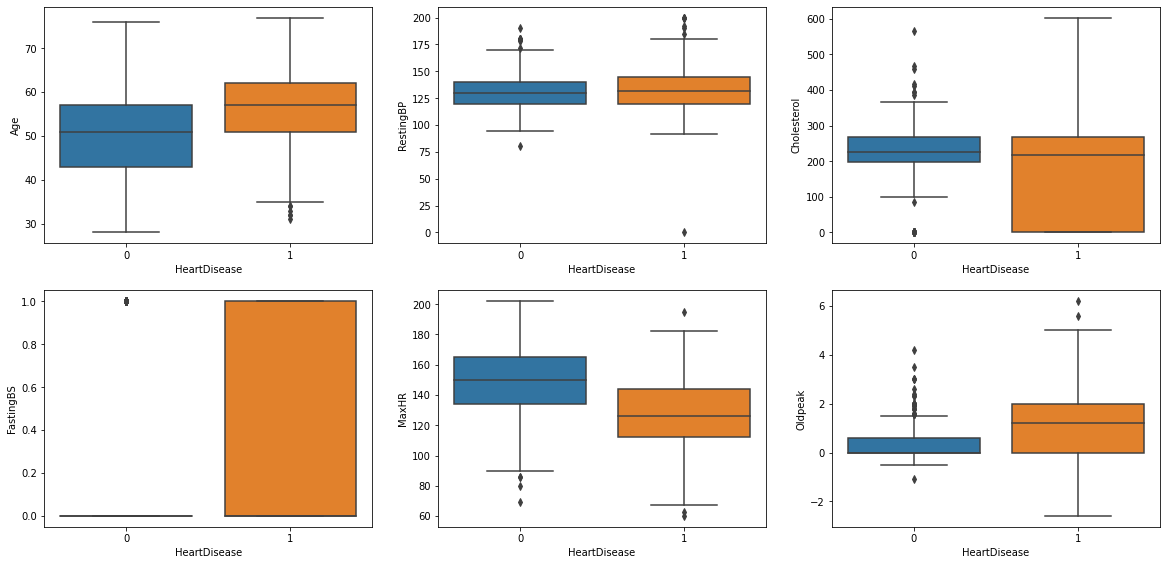

In [44]:
#draw a box plot for finding outliers
index = 0
plt.figure(figsize=(20,20))
for feature in numerical:
    if feature != "HeartDisease":
        index += 1
        plt.subplot(4, 3, index)
        sns.boxplot(x='HeartDisease', y=feature, data=df)

In [45]:
#plot scatter plot
fig = px.scatter_3d(df, 
                    x='RestingBP',
                    y='Age',
                    z='Sex',
                    color='HeartDisease')
fig.show()

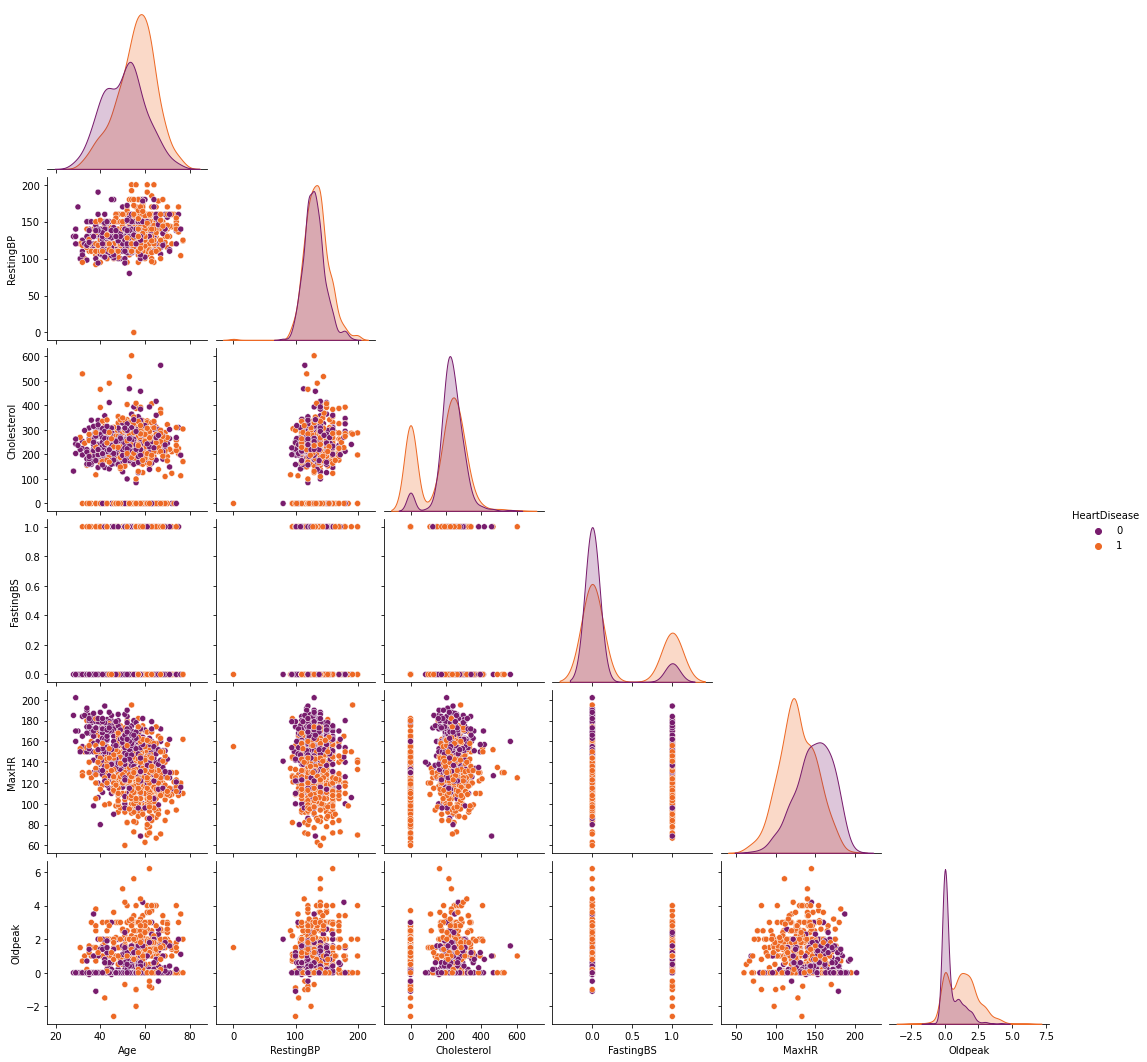

In [46]:
#plot a pair plot
sns.pairplot(df, hue="HeartDisease", palette="inferno", corner=True)

In [47]:
#finding a skewness values 
skew_vals = df.skew().sort_values(ascending=False)
skew_vals

FastingBS       1.264
Oldpeak         1.023
RestingBP       0.180
MaxHR          -0.144
Age            -0.196
HeartDisease   -0.215
Cholesterol    -0.610
dtype: float64

In [48]:
skew_limit = 0.5 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models. 
skew_vals = df.skew()
skew_cols = skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols 

FastingBS      1.264
Oldpeak        1.023
Cholesterol   -0.610
dtype: float64

In [49]:
#Interpreting Skewness 

for skew in skew_vals:
    if -0.5 < skew < 0.5:
        print ("A skewness value of", '\033[1m', Fore.GREEN, skew, '\033[0m', "means that the distribution is approx.", '\033[1m', Fore.GREEN, "symmetric", '\033[0m')
    elif  -0.5 < skew < -1.0 or 0.5 < skew < 1.0:
        print ("A skewness value of", '\033[1m', Fore.YELLOW, skew, '\033[0m', "means that the distribution is approx.", '\033[1m', Fore.YELLOW, "moderately skewed", '\033[0m')
    else:
        print ("A skewness value of", '\033[1m', Fore.RED, skew, '\033[0m', "means that the distribution is approx.", '\033[1m', Fore.RED, "highly skewed", '\033[0m')

A skewness value of   -0.19593302867569365  means that the distribution is approx.   symmetric 
A skewness value of   0.1798393100516288  means that the distribution is approx.   symmetric 
A skewness value of   -0.6100864307268192  means that the distribution is approx.   highly skewed 
A skewness value of   1.2644841750727027  means that the distribution is approx.   highly skewed 
A skewness value of   -0.14435941846180994  means that the distribution is approx.   symmetric 
A skewness value of   1.0228720218107528  means that the distribution is approx.   highly skewed 
A skewness value of   -0.21508633825088655  means that the distribution is approx.   symmetric 


In [50]:
kurtosis_vals = df.kurtosis().sort_values(ascending=False)
kurtosis_vals

RestingBP       3.271
Oldpeak         1.203
Cholesterol     0.118
Age            -0.386
FastingBS      -0.402
MaxHR          -0.448
HeartDisease   -1.958
dtype: float64

In [51]:
#Calculating Kurtosis 

kurtosis_limit = 7 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models.
kurtosis_vals = df.kurtosis()
kurtosis_cols = kurtosis_vals[abs(kurtosis_vals) > kurtosis_limit].sort_values(ascending=False)
kurtosis_cols

Series([], dtype: float64)

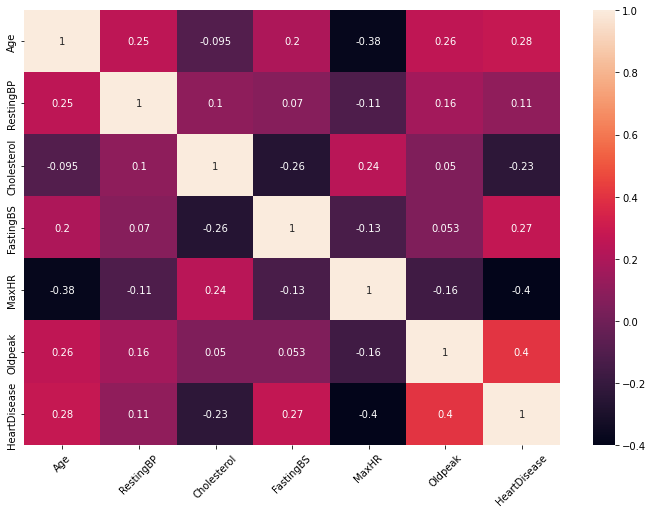

In [52]:
#plot a correlation graph
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=45);

In [53]:
df_temp = df.corr()

count = "Done"
feature =[]
collinear=[]
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .9 and df_temp[col][i] < 1) or (df_temp[col][i]< -.9 and df_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)
                print(Fore.RED + f"\033[1mmulticolinearity alert in between\033[0m {col} - {i}")
        else:
            print(f"For {col} and {i}, there is NO multicollinearity problem") 

print("\033[1mThe number of strong corelated features:\033[0m", count) 

For Age and Age, there is NO multicollinearity problem
For Age and RestingBP, there is NO multicollinearity problem
For Age and Cholesterol, there is NO multicollinearity problem
For Age and FastingBS, there is NO multicollinearity problem
For Age and MaxHR, there is NO multicollinearity problem
For Age and Oldpeak, there is NO multicollinearity problem
For Age and HeartDisease, there is NO multicollinearity problem
For RestingBP and Age, there is NO multicollinearity problem
For RestingBP and RestingBP, there is NO multicollinearity problem
For RestingBP and Cholesterol, there is NO multicollinearity problem
For RestingBP and FastingBS, there is NO multicollinearity problem
For RestingBP and MaxHR, there is NO multicollinearity problem
For RestingBP and Oldpeak, there is NO multicollinearity problem
For RestingBP and HeartDisease, there is NO multicollinearity problem
For Cholesterol and Age, there is NO multicollinearity problem
For Cholesterol and RestingBP, there is NO multicolline

In [54]:
#finding a categorical data
df[categorical].describe()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [55]:
df[categorical].iplot(kind='hist');

In [56]:
df[categorical].iplot(kind='histogram',subplots=True,bins=50)

In [57]:
df["Sex"].value_counts()

M    725
F    193
Name: Sex, dtype: int64

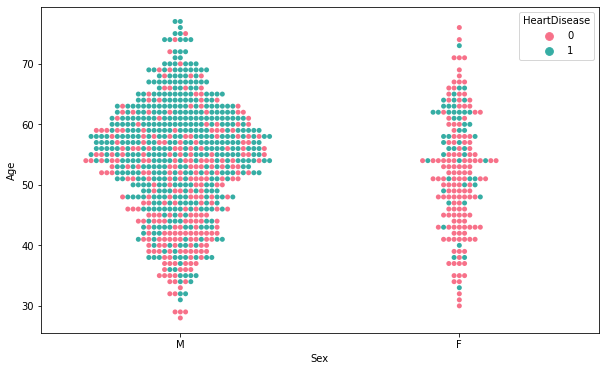

In [58]:
sns.swarmplot(y="Age", x="Sex", hue="HeartDisease", data=df, palette="husl");

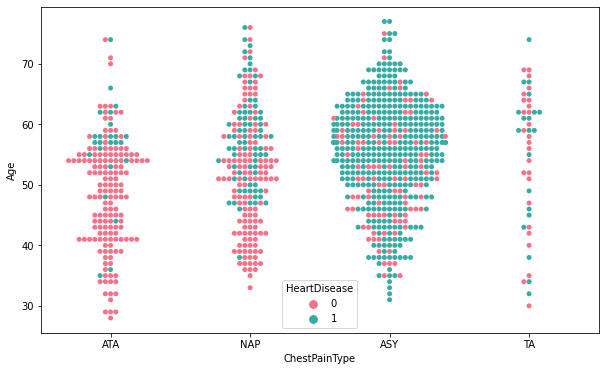

In [59]:
sns.swarmplot(y="Age", x="ChestPainType", hue="HeartDisease", data=df, palette="husl");

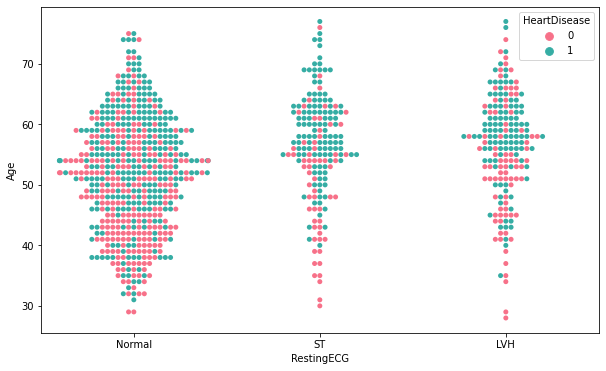

In [60]:
sns.swarmplot(y="Age", x="RestingECG", hue="HeartDisease", data=df, palette="husl");

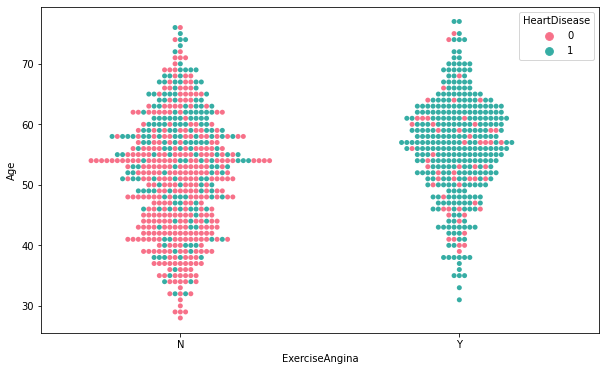

In [61]:
sns.swarmplot(y="Age", x="ExerciseAngina", hue="HeartDisease", data=df, palette="husl");

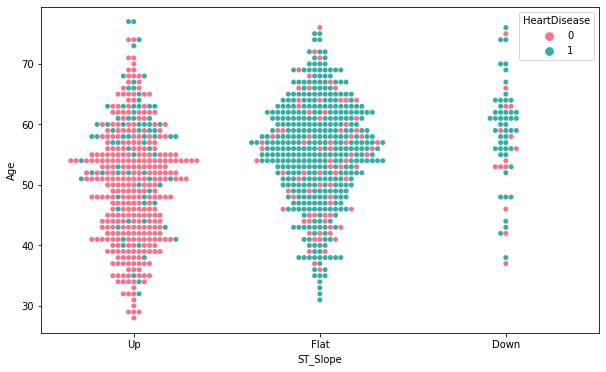

In [62]:
sns.swarmplot(y="Age", x="ST_Slope", hue="HeartDisease", data=df, palette="husl");

### Dummy Variables Operation

In [63]:
df.shape

(918, 12)

In [64]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.000,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.000,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.000,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.500,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.000,Up,0


In [65]:
df[categorical].value_counts()

Sex  ChestPainType  RestingECG  ExerciseAngina  ST_Slope
M    ASY            Normal      Y               Flat        109
     ATA            Normal      N               Up           64
     ASY            Normal      N               Flat         55
                    ST          Y               Flat         49
     NAP            Normal      N               Up           46
                                                           ... 
F    TA             Normal      N               Down          1
     NAP            Normal      Y               Flat          1
                                                Up            1
                    ST          N               Flat          1
M    TA             ST          Y               Flat          1
Length: 95, dtype: int64

In [66]:
df = pd.get_dummies(df, drop_first=True)

In [67]:
df.shape

(918, 16)

In [68]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.000,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.000,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.000,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.500,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.000,0,1,0,1,0,1,0,0,0,1


### Train & Test Split

In [69]:
X = df.drop(["HeartDisease"], axis=1)
y = df["HeartDisease"]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify = y, random_state = 101)

### FEATURE SCALING

In [71]:
scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [72]:
X_train_scaled = scaler.fit_transform(X_train)

In [73]:
X_test_scaled = scaler.transform(X_test)

In [74]:
def models(X_train, y_train, class_weight):
    
    # Logistic Regression
    log = LogisticRegression(random_state=101, class_weight=class_weight, solver='liblinear')
    log.fit(X_train, y_train)
    
    # Decision Tree
    decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state=101, class_weight=class_weight)
    decision_tree.fit(X_train, y_train)
    
    # Random Forest
    random_forest = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state=101, class_weight=class_weight)
    random_forest.fit(X_train, y_train)
  
    # Model Accuracy on Training Data
    print(f"\033[1m1) Logistic Regression Training Accuracy:\033[0m {log}")    
    print(f"\033[1m3) Decision Tree Training Accuracy:\033[0m {decision_tree}")
    print(f"\033[1m4) Random Forest Training Accuracy:\033[0m {random_forest}")
  
    return log.score(X_train, y_train), decision_tree.score(X_train, y_train),random_forest.score(X_train, y_train)

In [75]:
def models_accuracy(X_Set, y_Set):    
    Scores = pd.DataFrame(columns = ["LR_Acc","DT_Acc", "RF_Acc"])

    print("\033[1mBASIC ACCURACY\033[0m")
    Basic = [log_acc, decision_tree_acc, random_forest_acc] = models(X_train, y_train, None)
    Scores.loc[0] = Basic

    print("\n\033[1mSCALED ACCURACY WITHOUT BALANCED\033[0m")    
    Scaled = [log_acc, decision_tree_acc, random_forest_acc] = models(X_train_scaled, y_train, None)
    Scores.loc[1] = Scaled

    
    print("\n\033[1mBASIC ACCURACY WITH BALANCED\033[0m")
    Balanced = [log_acc,decision_tree_acc, random_forest_acc] = models(X_train, y_train, "balanced")
    Scores.loc[2] = Balanced

    print("\n\033[1mSCALED ACCURACY WITH BALANCED\033[0m")    
    Scaled_Balanced = [log_acc,decision_tree_acc, random_forest_acc] = models(X_train_scaled, y_train, "balanced")
    Scores.loc[3] = Scaled_Balanced

    Scores.set_axis(['Basic', 'Scaled', 'Balanced', 'Scaled_Balanced'], axis='index', inplace=True)
    #Scores.style.background_gradient(cmap='RdPu')

    return Scores.style.applymap(lambda x: "background-color: pink" if x<0.6 or x == 1 else "background-color: lightgreen")\
                       .applymap(lambda x: 'opacity: 40%;' if (x < 0.8) else None)\
                       .applymap(lambda x: 'color: red' if x == 1 or x <=0.8 else 'color: darkblue')


In [76]:
models_accuracy(X_train, y_train)

BASIC ACCURACY
1) Logistic Regression Training Accuracy: LogisticRegression(random_state=101, solver='liblinear')
3) Decision Tree Training Accuracy: DecisionTreeClassifier(criterion='entropy', random_state=101)
4) Random Forest Training Accuracy: RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=101)

SCALED ACCURACY WITHOUT BALANCED
1) Logistic Regression Training Accuracy: LogisticRegression(random_state=101, solver='liblinear')
3) Decision Tree Training Accuracy: DecisionTreeClassifier(criterion='entropy', random_state=101)
4) Random Forest Training Accuracy: RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=101)

BASIC ACCURACY WITH BALANCED
1) Logistic Regression Training Accuracy: LogisticRegression(class_weight='balanced', random_state=101,
                   solver='liblinear')
3) Decision Tree Training Accuracy: DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=101)
4) Rando

,LR_Acc,DT_Acc,RF_Acc
Basic,0.870513,1.000000,0.989744
Scaled,0.861538,1.000000,0.989744
Balanced,0.865385,1.000000,0.997436
Scaled_Balanced,0.866667,1.000000,0.997436


In [77]:
Scores = pd.DataFrame(columns = ["LR_Acc", "DT_Acc", "RF_Acc"])

print("\033[1mBASIC ACCURACY\033[0m")
Basic = [log_acc,decision_tree_acc, random_forest_acc] = models(X_train, y_train, None)
Scores.loc[0] = Basic

print("\n\033[1mSCALED ACCURACY WITHOUT BALANCED\033[0m")    
Scaled = [log_acc,decision_tree_acc, random_forest_acc] = models(X_train_scaled, y_train, None)
Scores.loc[1] = Scaled

print("\n\033[1mBASIC ACCURACY WITH BALANCED\033[0m")
Balanced = [log_acc,decision_tree_acc, random_forest_acc,] = models(X_train, y_train, "balanced")
Scores.loc[2] = Balanced

print("\n\033[1mSCALED ACCURACY WITH BALANCED\033[0m")    
Scaled_Balanced = [log_acc,decision_tree_acc, random_forest_acc] = models(X_train_scaled, y_train, "balanced")
Scores.loc[3] = Scaled_Balanced

Scores.set_axis(['Basic', 'Scaled', 'Balanced', 'Scaled_Balanced'], axis='index', inplace=True)

BASIC ACCURACY
1) Logistic Regression Training Accuracy: LogisticRegression(random_state=101, solver='liblinear')
3) Decision Tree Training Accuracy: DecisionTreeClassifier(criterion='entropy', random_state=101)
4) Random Forest Training Accuracy: RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=101)

SCALED ACCURACY WITHOUT BALANCED
1) Logistic Regression Training Accuracy: LogisticRegression(random_state=101, solver='liblinear')
3) Decision Tree Training Accuracy: DecisionTreeClassifier(criterion='entropy', random_state=101)
4) Random Forest Training Accuracy: RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=101)

BASIC ACCURACY WITH BALANCED
1) Logistic Regression Training Accuracy: LogisticRegression(class_weight='balanced', random_state=101,
                   solver='liblinear')
3) Decision Tree Training Accuracy: DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=101)
4) Rando

In [78]:
accuracy_scores = Scores.style.applymap(lambda x: "background-color: pink" if x<0.6 or x == 1 else "background-color: lightgreen")\
                              .applymap(lambda x: 'opacity: 40%;' if (x < 0.8) else None)\
                              .applymap(lambda x: 'color: red' if x == 1 or x <=0.8 else 'color: darkblue')

accuracy_scores

,LR_Acc,DT_Acc,RF_Acc
Basic,0.870513,1.000000,0.989744
Scaled,0.861538,1.000000,0.989744
Balanced,0.865385,1.000000,0.997436
Scaled_Balanced,0.866667,1.000000,0.997436


In [79]:
operations = [("scaler", MinMaxScaler()), ("power", PowerTransformer()), ("log", LogisticRegression(random_state=101))]
pipe_log_model = Pipeline(steps=operations)
pipe_log_model.fit(X_train, y_train)
y_pred = pipe_log_model.predict(X_test)
y_train_pred = pipe_log_model.predict(X_train)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[52 10]
 [ 7 69]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        62
           1       0.87      0.91      0.89        76

    accuracy                           0.88       138
   macro avg       0.88      0.87      0.87       138
weighted avg       0.88      0.88      0.88       138



In [80]:
pipe_scores = cross_validate(pipe_log_model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_pipe_scores = pd.DataFrame(pipe_scores, index = range(1, 11))

df_pipe_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.063,0.012,0.795,0.787,0.860,0.822
2,0.091,0.013,0.821,0.822,0.860,0.841
3,0.095,0.013,0.885,0.886,0.907,0.897
4,0.110,0.012,0.833,0.875,0.814,0.843
5,0.093,0.013,0.897,0.889,0.930,0.909
6,0.109,0.014,0.821,0.822,0.860,0.841
7,0.093,0.012,0.872,0.851,0.930,0.889
8,0.116,0.015,0.833,0.826,0.884,0.854
9,0.098,0.015,0.833,0.878,0.818,0.847
10,0.092,0.013,0.923,0.913,0.955,0.933


In [81]:
df_pipe_scores.mean()[2:]

test_accuracy    0.851
test_precision   0.855
test_recall      0.882
test_f1          0.868
dtype: float64

# LogisticRegression

[[51 11]
 [ 6 70]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.82      0.86        62
           1       0.86      0.92      0.89        76

    accuracy                           0.88       138
   macro avg       0.88      0.87      0.87       138
weighted avg       0.88      0.88      0.88       138

--------------------------------------------------------


,train_set,test_set
Accuracy,0.862,0.877
Precision,0.867,0.864
Recall,0.887,0.921
f1,0.876,0.892


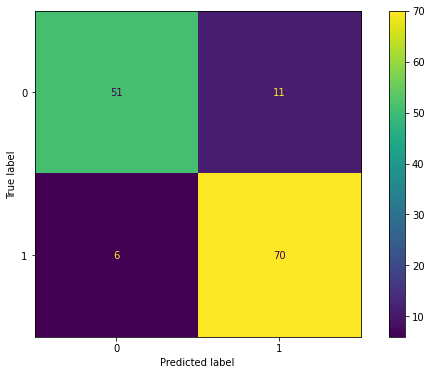

In [82]:
LR_model = LogisticRegression() # Since Basic accuracy outcome gives the best model accuracy results, we will implement it 
LR_model.fit(X_train_scaled, y_train)
y_pred = LR_model.predict(X_test_scaled)
y_train_pred = LR_model.predict(X_train_scaled)

log_f1 = f1_score(y_test, y_pred)
log_acc = accuracy_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(LR_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

In [83]:
y_pred_proba = LR_model.predict_proba(X_test_scaled)

In [84]:
test_data = pd.concat([X_test.set_index(y_test.index), y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:, 1]
test_data.sample(10)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,HeartDisease,pred,pred_proba
879,48,110,229,0,168,1.000,1,1,0,0,1,0,0,0,0,1,0,0.185
831,63,135,252,0,172,0.000,0,0,1,0,0,0,0,0,1,0,0,0.031
870,71,160,302,0,162,0.400,0,1,0,0,1,0,0,0,1,0,0,0.029
839,35,138,183,0,182,1.400,0,0,0,0,1,0,0,0,1,0,0,0.112
894,58,130,197,0,131,0.600,0,0,0,0,1,0,0,1,0,0,1,0.629
741,62,120,267,0,99,1.800,1,0,0,0,1,0,1,1,0,1,1,0.949
121,52,125,272,0,139,0.000,0,0,1,0,1,0,0,0,1,0,0,0.024
537,74,150,258,1,130,4.000,1,0,0,0,0,1,1,0,0,1,1,0.963
869,59,150,212,1,157,1.600,1,0,1,0,1,0,0,0,1,0,0,0.298
98,56,120,85,0,140,0.000,1,0,0,0,1,0,0,0,1,0,0,0.396


# Decision Tree

[[50 12]
 [ 9 67]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        62
           1       0.85      0.88      0.86        76

    accuracy                           0.85       138
   macro avg       0.85      0.84      0.85       138
weighted avg       0.85      0.85      0.85       138

--------------------------------------------------------


,train_set,test_set
Accuracy,1.000,0.848
Precision,1.000,0.848
Recall,1.000,0.882
f1,1.000,0.865


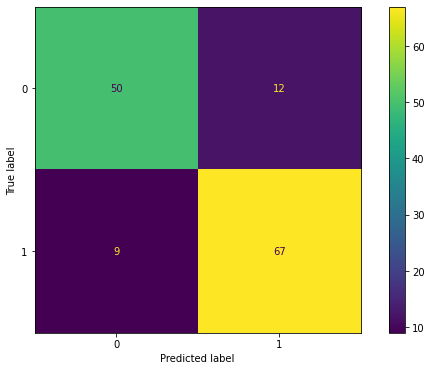

In [85]:
decision_tree_model = DecisionTreeClassifier(criterion = 'entropy', random_state=101) # Since Basic accuracy outcome gives the best model accuracy results, we will implement it 
decision_tree_model.fit(X_train_scaled, y_train)
y_pred = decision_tree_model.predict(X_test_scaled)
y_train_pred = decision_tree_model.predict(X_train_scaled)

log_f1 = f1_score(y_test, y_pred)
log_acc = accuracy_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(decision_tree_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

In [86]:
y_pred_proba = decision_tree_model.predict_proba(X_test_scaled)

In [87]:
test_data = pd.concat([X_test.set_index(y_test.index), y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:, 1]
test_data.sample(10)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,HeartDisease,pred,pred_proba
422,65,150,236,1,105,0.000,1,0,0,0,0,1,1,1,0,1,1,1.000
750,46,142,177,0,160,1.400,0,0,1,0,0,0,1,0,0,0,0,0.000
683,44,118,242,0,149,0.300,0,0,1,0,1,0,0,1,0,0,0,0.000
537,74,150,258,1,130,4.000,1,0,0,0,0,1,1,0,0,1,1,1.000
828,58,128,216,0,131,2.200,1,0,0,0,0,0,1,1,0,1,1,1.000
845,61,145,307,0,146,1.000,0,0,0,0,0,0,1,1,0,1,1,1.000
676,51,130,305,0,142,1.200,0,0,0,0,1,0,1,1,0,1,1,1.000
783,45,138,236,0,152,0.200,0,0,0,0,0,0,1,1,0,0,0,0.000
602,61,120,337,0,98,0.000,1,0,1,0,1,0,1,1,0,1,1,1.000
719,63,130,254,0,147,1.400,1,0,0,0,0,0,0,1,0,1,0,0.000


# Random Forest

[[46 16]
 [13 63]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.74      0.76        62
           1       0.80      0.83      0.81        76

    accuracy                           0.79       138
   macro avg       0.79      0.79      0.79       138
weighted avg       0.79      0.79      0.79       138

--------------------------------------------------------


,train_set,test_set
Accuracy,0.790,0.790
Precision,0.796,0.797
Recall,0.833,0.829
f1,0.814,0.813


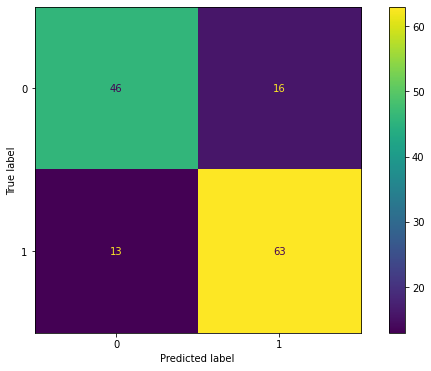

In [88]:

random_forest_model = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state=101)
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test_scaled)
y_train_pred = random_forest_model.predict(X_train_scaled)

log_f1 = f1_score(y_test, y_pred)
log_acc = accuracy_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(random_forest_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

In [89]:
y_pred_proba = random_forest_model.predict_proba(X_test_scaled)
test_data = pd.concat([X_test.set_index(y_test.index), y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:, 1]
test_data.sample(10)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,HeartDisease,pred,pred_proba
543,70,170,192,0,129,3.000,1,0,0,0,0,1,1,0,0,1,0,0.400
685,61,120,260,0,140,3.600,1,0,0,0,1,0,1,1,0,1,1,0.800
167,48,140,238,0,118,0.000,1,1,0,0,1,0,0,0,1,0,0,0.100
580,51,131,152,1,130,1.000,1,0,0,0,0,0,1,1,0,1,1,0.800
767,54,108,267,0,167,0.000,0,0,1,0,0,0,0,0,1,0,0,0.400
578,57,156,173,0,119,3.000,1,0,0,0,0,0,1,0,0,1,0,0.500
241,54,200,198,0,142,2.000,1,0,0,0,1,0,1,1,0,1,1,0.800
869,59,150,212,1,157,1.600,1,0,1,0,1,0,0,0,1,0,1,0.900
247,48,122,275,1,150,2.000,1,0,0,0,0,1,1,0,0,1,0,0.400
500,65,136,248,0,140,4.000,1,0,0,0,1,0,1,0,0,1,0,0.500


# ANN

In [90]:
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [91]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
from tensorflow.keras.optimizers import SGD
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 100,callbacks=[early_stopping], validation_split=0.2)

Epoch 1/100
20/20 [==============================] - 1s 18ms/step - loss: 0.6929 - accuracy: 0.5433 - val_loss: 0.6921 - val_accuracy: 0.5705
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 0.6922 - accuracy: 0.5497 - val_loss: 0.6914 - val_accuracy: 0.5705
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6914 - accuracy: 0.5497 - val_loss: 0.6899 - val_accuracy: 0.5705
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6889 - accuracy: 0.5497 - val_loss: 0.6858 - val_accuracy: 0.5705
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6840 - accuracy: 0.5497 - val_loss: 0.6748 - val_accuracy: 0.5705
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6677 - accuracy: 0.5497 - val_loss: 0.6537 - val_accuracy: 0.5705
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6605 - accuracy: 0.5497 - val_loss: 0.6461 - val_accuracy: 0.5705
Epoch 8/100


In [92]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 70.84%


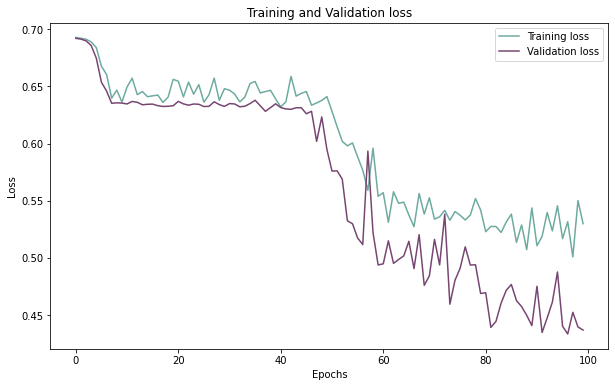

In [93]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#6daa9f", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#774571", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

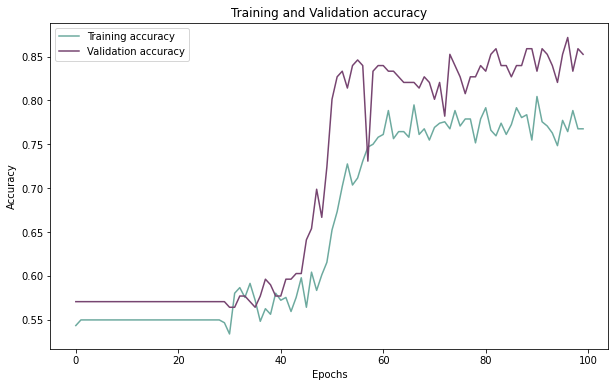

In [94]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#6daa9f", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#774571", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [95]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()

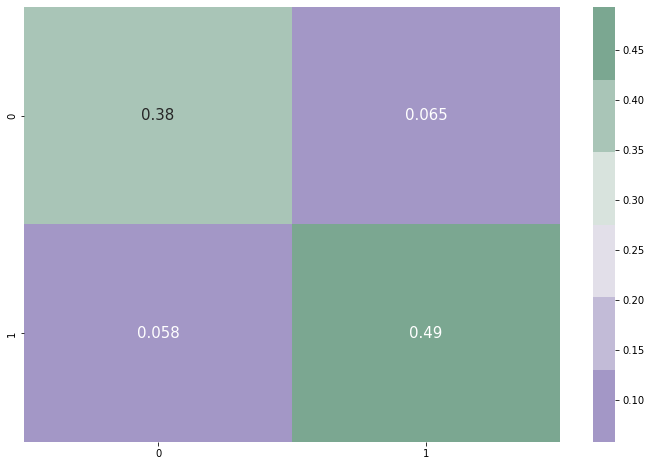

In [96]:
# confusion matrix
cmap1 = sns.diverging_palette(275,150,  s=40, l=65, n=6)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        62
           1       0.88      0.89      0.89        76

    accuracy                           0.88       138
   macro avg       0.88      0.87      0.88       138
weighted avg       0.88      0.88      0.88       138

